In [2]:
from sklearn import datasets
from sklearn import svm, metrics
import matplotlib.pyplot as plt

手書き数字データセットを読み込む

In [3]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target
n_train = len(X) * 2 // 3

In [4]:
# 訓練データ
X_train, Y_train = X[:n_train], Y[:n_train]
# テストデータ
X_test, Y_test = X[n_train:], Y[n_train:]

In [5]:
# 学習器の作成と学習
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, Y_train)

SVC(gamma=0.001)

In [6]:
# モデルの学習結果を評価する
accuracy = clf.score(X_test, Y_test)
print(f"正答率{accuracy}")
predicted = clf.predict(X_test)
n_error = (Y_test != predicted).sum()
print(f"誤った個数：{n_error}")

正答率0.9632721202003339
誤った個数：22


In [7]:
# 詳しいレポート
print("classification report")
print(metrics.classification_report(Y_test, predicted))
print("confusion matrix")
print(metrics.confusion_matrix(Y_test, predicted))

classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.81      0.88        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.95      1.00      0.98        61
           8       0.89      0.98      0.93        55
           9       0.95      0.97      0.96        58

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599

confusion matrix
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0

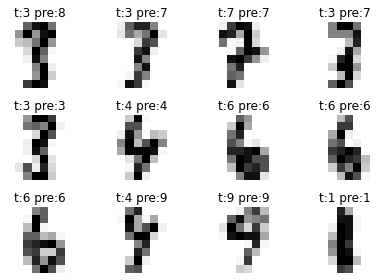

In [8]:
# 画像イメージと分類結果
imgs_yt_preds = list(zip(digits.images[n_train:], Y_test, predicted))
for index, (image, y_t, pred) in enumerate(imgs_yt_preds[404:416]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(image, cmap="Greys", interpolation="nearest")
    plt.title(f't:{y_t} pre:{pred}', fontsize=12)
plt.show()